<a href="https://colab.research.google.com/github/taniokah/Sports_Analysis/blob/master/OpenCV_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCVテスト

In [0]:
%matplotlib inline
import cv2 #　opencvのインポート
import matplotlib.pyplot as plt # matplotlib(描画用)

print(cv2.__version__)

3.4.3


In [0]:
!pip install pytube
!pip install ffmpeg

  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


In [0]:
from pytube import YouTube

#yt = YouTube("https://www.youtube.com/watch?v=ZvFNaUWLj9Y")
yt = YouTube("https://youtu.be/l00CwQ6HI_o")
#yt.streams.first().download()
yt.streams.get_by_itag(313).download()

'/content/20190224 鹿屋体育大学 vs 鹿児島高専 1st.webm'

In [0]:
#yt.streams.all()
#yt.streams.filter(progressive=False).order_by('resolution').desc().all()
yt.streams.get_by_itag(313)

<Stream: itag="313" mime_type="video/webm" res="2160p" fps="30fps" vcodec="vp9">

In [0]:
!rm -rf screen_caps
!mkdir screen_caps

In [0]:
#動画ファイルを読み込む
#file_name = u"20190217 徳島大学医学部 vs 吉野クラブ 2nd No2.mp4"
#file_name = u"20190224 鹿屋体育大学 vs 鹿児島高専 1st.mp4"
file_name = u"/content/20190224 鹿屋体育大学 vs 鹿児島高専 1st.webm"
video = cv2.VideoCapture(file_name)

#フレームレート数の取得
frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print('frame_count = ' + str(frame_count))

#フレームレート(1フレームの時間単位はミリ秒)の取得
frame_rate = int(video.get(cv2.CAP_PROP_FPS))
print('frame_rate = ' + str(frame_rate))

# 画像を保存する
dir_name = "screen_caps"
for i in range(frame_count):
  _, frame = video.read()
  if i % 330 == 0: # 10秒で1枚
    file_name = dir_name+ "/" + str(i) + ".png"
    cv2.imwrite(file_name, frame)
  if i > 4000:
    break


frame_count = 89369
frame_rate = 29


In [0]:
!pip install natsort

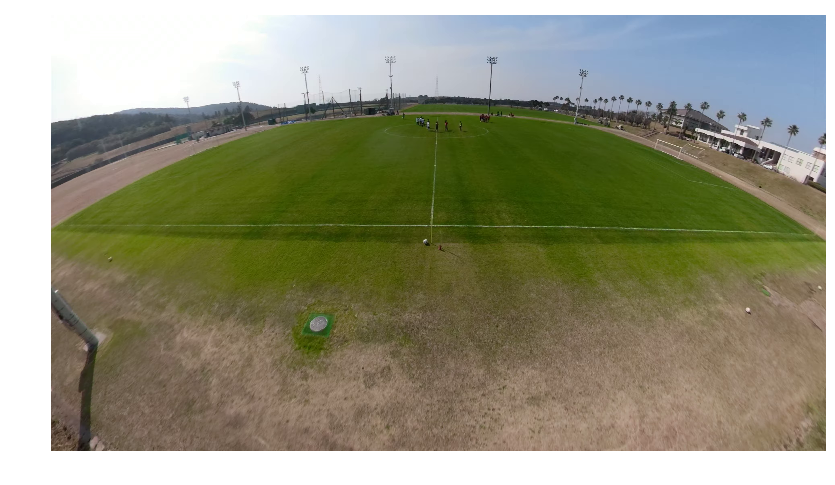

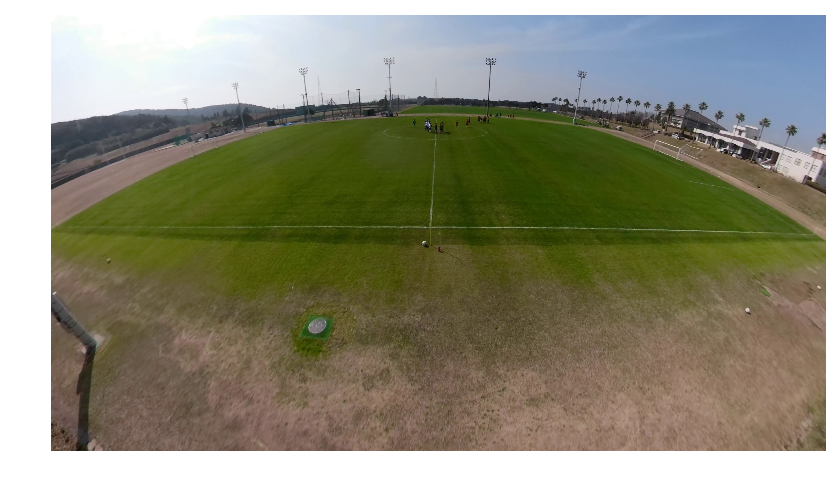

In [0]:
import os
import glob
from natsort import natsorted

%matplotlib inline
import matplotlib.pyplot as plt # matplotlib(描画用)

dir_name = "screen_caps"
files = glob.glob(dir_name + "/*")
files = natsorted(files)

# 先頭から2枚を表示
#for i in range(frame_count):
height = 2
for i in range(height):
  #file_name = dir_name+ "/" + str(i) + ".png"
  file_name = files[i]
  img = cv2.imread(file_name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10, 10), dpi=100)
  #plt.subplot(height, 1, i + 1)
  plt.axis('off')
  plt.imshow(img) #表示


In [0]:
!rm -rf masked_caps
!mkdir masked_caps

In [0]:
import cv2

import os
import glob
from natsort import natsorted

def mask(file_name):

  img_BGR = cv2.imread(file_name)

  # L*a*b*
  img_Lab = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2Lab)
  img_Lab_L, img_Lab_a, img_Lab_b = cv2.split(img_Lab)
  # cv2.imwrite('chirsuta.a.jpg', img_Lab_L)

  # detect green area with a* value
  _thres, img_green = cv2.threshold(img_Lab_a, 120, 255, cv2.THRESH_BINARY_INV)

  # get masked BGR images
  img_green_masked = cv2.bitwise_and(img_BGR, img_BGR, mask=img_green)
  # cv2.imwrite('chirsuta.mask.jpg', img_green)

  dir_name = "masked_caps"
  file = os.path.basename(file_name)
  name, _ = os.path.splitext(file)
  cv2.imwrite(dir_name + '/' + name + '.png', img_green_masked)

dir_name = "screen_caps"
files = glob.glob(dir_name + "/*")
files = natsorted(files)

#for i in range(frame_count):
for i in files:
  #file_name = dir_name+ "/" + str(i) + ".png"
  #print(i)  
  mask(i)


In [0]:
!zip -r screen_caps.zip screen_caps


In [0]:
import numpy as np
import cv2
import glob

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

dir_name = "screen_caps"

images = glob.glob(dir_name + '/*.png')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [15]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

[]

In [0]:
img = cv2.imread(dir_name + '/0.png')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

In [0]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

In [0]:
import cv2
import numpy as np

img = cv2.imread(dir_name + "/0.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

ret, contours, hierarchy = cv2.findContours(thresh , cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )

In [0]:
menseki=[ ]

for i in range(0, len(contours)): 
    menseki.append([contours[i],cv2.contourArea(contours[i])])

menseki.sort(key=lambda x: x[1], reverse=True)

In [58]:
index = 0
file_name = 'result_' + str(index) + '.png'

epsilon = 0.1*cv2.arcLength(menseki[index][0],True)
approx = cv2.approxPolyDP(menseki[index][0],epsilon,True)

cv2.drawContours(img, approx, -1,(0, 0, 255),10)
cv2.imwrite(file_name, img)


True

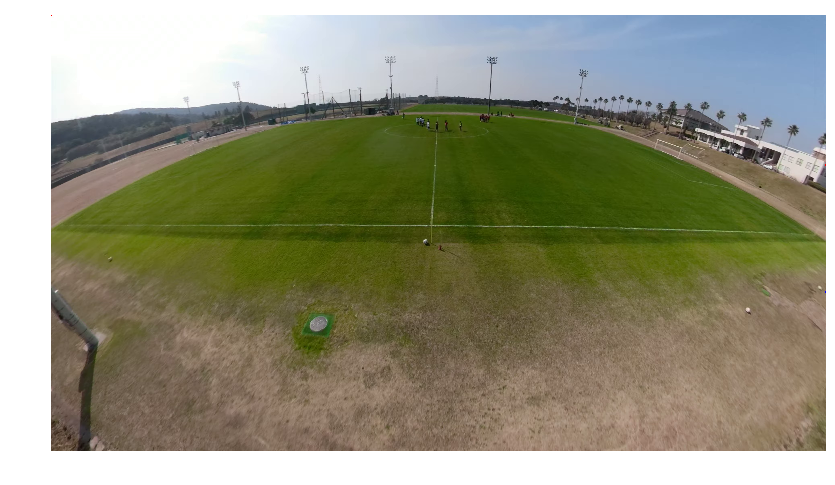

In [46]:
index = 0
file_name = 'result_' + str(index) + '.png'

img = cv2.imread(file_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10), dpi=100)
#plt.subplot(height, 1, i + 1)
plt.axis('off')
plt.imshow(img) #表示


In [65]:
print(img.shape)

#perspective1 = np.float32([[0, 0],[1654, 0],[1654, 2340],[0, 2340]])
#perspective2 = np.float32([[0, 0],[1654, 0],[1654, 2340],[0, 2340]])

(2160, 3840, 3)


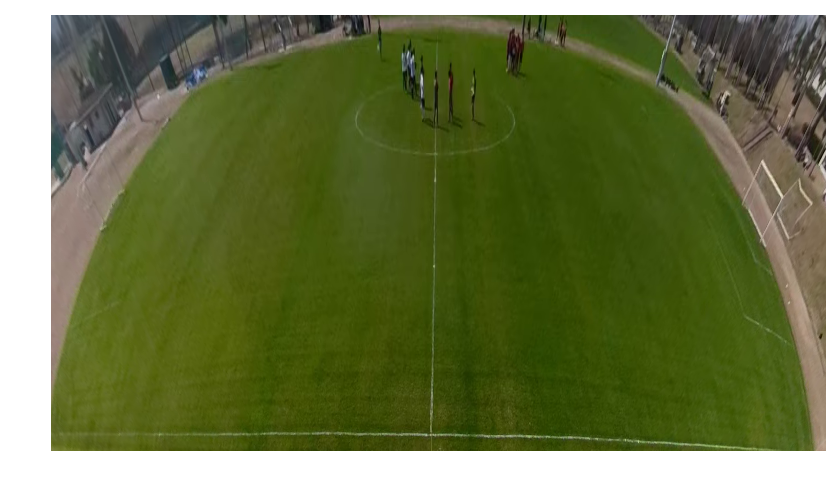

In [78]:
perspective1 = np.float32([[800, 480],[3840 - 800, 480],[0, 1080],[3840, 1080]])
perspective2 = np.float32([[0, 0],[3840, 0],[0, 2160],[3840, 2160]])

index = 0
file_name = 'result_' + str(index) + '.png'

img = cv2.imread(file_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

psp_matrix = cv2.getPerspectiveTransform(perspective1,perspective2)
img_psp = cv2.warpPerspective(img, psp_matrix,(3840, 2160))

cv2.imwrite("image_modified2.png", img_psp)

file_name = 'image_modified2.png'

img = cv2.imread(file_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10), dpi=100)
#plt.subplot(height, 1, i + 1)
plt.axis('off')
plt.imshow(img) #表示


[[[0, 0]], [[3839, 741]]]